<a href="https://colab.research.google.com/github/Rishabh1928/Company_Classification_Clustering/blob/main/Rishabh_Kesarwani_Company_Classification_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Problem Statement :**

Classify businesses and companies across a standard taxonomy.

This dataset comes with pre-classified companies along with data from the website.

The main objective is to cluster companies based on their description on the website.

###**Overview of columns in the dataset :**

1. website: The website of the company/business
2. company_name: The company/business name
3. homepage_text : Visible homepage text
4. h1: The heading 1 tags from the html of the home page
5. h2: The heading 2 tags from the html of the home page
6. h3: The heading 3 tags from the html of the home page
7. navlinktext: The visible titles of navigation links on the homepage (Ex: Home, Services,
Product, About Us, Contact Us)
8. metakeywords: The meta keywords in the header of the page html for SEO (More info:
https://www.w3schools.com/tags/tag_meta.asp)
9. metadescription: The meta description in the header of the page html for SEO (More info:
https://www.w3schools.com/tags/tag_meta.asp)

In [78]:
# Loading the basic dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
# Loading data

file_path = "/content/drive/MyDrive/Almabetter/Capstone Project 2 (Company Classification)/DATA/data_company_classification.csv"
df = pd.read_csv(file_path)

**Basic Inspection**

In [80]:
# Checking head of df

df.head()

website  ...                                                                                                                                                                                                                              meta_description
0  bipelectric.com         ...  Providing quality, reliable full service residential and commercial electrical contractors service in Vero Beach Fl and Indian River County                                                                                                 
1  eliasmedical.com        ...  For the best value in Bakersfield skin care treatment by a medical doctor as well as compassionate family medicine care visit Elias Medical.  Haven�t tried Botox, Restylane, Photofacial or Juvederm yet?  Now is your chance.             
2  koopsoverheaddoors.com  ...  Koops Overhead Doors specializes in the sales, service, repair, and installation of garage doors and electric garage door openers. Servicing Albany, Troy, Clifton Park, East Greenbush and the surrounding Capital District New York areas.
3  midtowneyes.com         ...  We would like to welcome you to Midtown Eyecare. The professionals at our practice provide each patient with quality vision solutions and exceptional customer service. Our staff is experienced in all...                                  
4  reprosecurity.co.uk     ...  Repro Security provide a range of tailor made security and fire systems to ensure that your family, home or business is protected.                                                                                                          

[5 rows x 9 columns]

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73974 entries, 0 to 73973
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   website           73974 non-null  object
 1   company_name      73974 non-null  object
 2   homepage_text     73305 non-null  object
 3   h1                46653 non-null  object
 4   h2                53212 non-null  object
 5   h3                44659 non-null  object
 6   nav_link_text     48050 non-null  object
 7   meta_keywords     23672 non-null  object
 8   meta_description  66886 non-null  object
dtypes: object(9)
memory usage: 5.1+ MB


In [82]:
df.shape

(73974, 9)

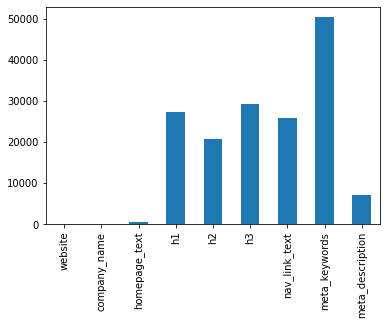

In [83]:
# Null values in dataset

df.isnull().sum().plot.bar()

`I need to takecare for headers, so I will be doing most of the things on h1 , h2 & h3`

In [84]:
df.h1.describe()

count     46653
unique    44133
top       Home 
freq      630  
Name: h1, dtype: object

In [85]:
df.h2.describe()

count     53212                                                                                                                                        
unique    50732                                                                                                                                        
top       Follow Us:and share our news...#sep#UK.COM Awards: The Winner Takes It All...#sep#2 Character Domains: Short, valuable, memorable and rare...
freq      107                                                                                                                                          
Name: h2, dtype: object

In [86]:
df.h3.describe()

count     44659                                                                        
unique    42130                                                                        
top       Safe Payments By Adyen#sep#Fast Domain Transfers#sep#Buyer Protection Program
freq      117                                                                          
Name: h3, dtype: object

In [87]:
# Constructing a df that will have headers only! (Will take company name as well for any reference)

df_headers = df[["company_name" , "h1" , "h2" , "h3"]]

In [88]:
df_headers.head()

,company_name,h1,h2,h3
0,bip dipietro electric inc,NaN,NaN,NaN
1,elias medical,"Offering Bakersfield family medical care from pediatrics to geriatrics. Also offering skin care including Botox, Laser skin treatments and more.#sep#Elias Medical",Welcome to ELIAS MEDICAL#sep#Family Medical Practice#sep#SKIN CARE#sep#Schedule a Consultation\n661.663.0300,Get To Know Elias Medical#sep#Family Medical Practice#sep#Consultations#sep#Skin Care
2,koops overhead doors,NaN,Customer Reviews#sep#Welcome to Koops Overhead Doors!,NaN
3,midtown eyecare,NaN,Welcome to our practice!,NaN
4,repro security ltd,NaN,Welcome to REPRO SECURITY Ltd,NaN


In [89]:
df_headers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73974 entries, 0 to 73973
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  73974 non-null  object
 1   h1            46653 non-null  object
 2   h2            53212 non-null  object
 3   h3            44659 non-null  object
dtypes: object(4)
memory usage: 2.3+ MB


In [90]:
df_headers.shape

(73974, 4)

In [91]:
# Null values in header h1

print("Count of null values in h1:" , df_headers["h1"].isnull().sum())

# Percentage of null values for h1

print("Percentage of null values in h1: " , round(df_headers["h1"].isnull().sum() / df_headers.shape[0] * 100 , 2))

Count of null values in h1: 27321
Percentage of null values in h1:  36.93


In [92]:
# Null values in header h2

print("Count of null values in h2:" , df_headers["h2"].isnull().sum())

# Percentage of null values for h2

print("Percentage of null values in h2: " , round(df_headers["h2"].isnull().sum() / df_headers.shape[0] * 100 , 2))

Count of null values in h2: 20762
Percentage of null values in h2:  28.07


In [93]:
# Null values in header h3

print("Count of null values in h3:" , df_headers["h3"].isnull().sum())

# Percentage of null values for h3

print("Percentage of null values in h3: " , round(df_headers["h3"].isnull().sum() / df_headers.shape[0] * 100 , 2))

Count of null values in h3: 29315
Percentage of null values in h3:  39.63


*It's like loosing too much information if we opt for dropping null values!!*

**Let's combine h1 , h2 & h3 and then check for null..**

In [94]:
# Replacing null values with empty string (so that when we combine header, it won't screw up because of NaN)

df_headers = df_headers.fillna(" ")

In [95]:
df_headers.head()

,company_name,h1,h2,h3
0,bip dipietro electric inc,,,
1,elias medical,"Offering Bakersfield family medical care from pediatrics to geriatrics. Also offering skin care including Botox, Laser skin treatments and more.#sep#Elias Medical",Welcome to ELIAS MEDICAL#sep#Family Medical Practice#sep#SKIN CARE#sep#Schedule a Consultation\n661.663.0300,Get To Know Elias Medical#sep#Family Medical Practice#sep#Consultations#sep#Skin Care
2,koops overhead doors,,Customer Reviews#sep#Welcome to Koops Overhead Doors!,
3,midtown eyecare,,Welcome to our practice!,
4,repro security ltd,,Welcome to REPRO SECURITY Ltd,


In [96]:
# Merging h1 , h2 & h3

df_headers["headers"] = df_headers["h1"] + " " + df_headers["h2"] + " " + df_headers["h3"]

In [97]:
pd.set_option("display.max_colwidth" , -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [98]:
df_headers.head()

,company_name,h1,h2,h3,headers
0,bip dipietro electric inc,,,,
1,elias medical,"Offering Bakersfield family medical care from pediatrics to geriatrics. Also offering skin care including Botox, Laser skin treatments and more.#sep#Elias Medical",Welcome to ELIAS MEDICAL#sep#Family Medical Practice#sep#SKIN CARE#sep#Schedule a Consultation\n661.663.0300,Get To Know Elias Medical#sep#Family Medical Practice#sep#Consultations#sep#Skin Care,"Offering Bakersfield family medical care from pediatrics to geriatrics. Also offering skin care including Botox, Laser skin treatments and more.#sep#Elias Medical Welcome to ELIAS MEDICAL#sep#Family Medical Practice#sep#SKIN CARE#sep#Schedule a Consultation\n661.663.0300 Get To Know Elias Medical#sep#Family Medical Practice#sep#Consultations#sep#Skin Care"
2,koops overhead doors,,Customer Reviews#sep#Welcome to Koops Overhead Doors!,,Customer Reviews#sep#Welcome to Koops Overhead Doors!
3,midtown eyecare,,Welcome to our practice!,,Welcome to our practice!
4,repro security ltd,,Welcome to REPRO SECURITY Ltd,,Welcome to REPRO SECURITY Ltd


In [99]:
# Now, dropping h1 , h2 & h3

df_headers.drop(["h1" , "h2" , "h3"] , axis = 1 , inplace=True)

In [100]:
df_headers.head()

,company_name,headers
0,bip dipietro electric inc,
1,elias medical,"Offering Bakersfield family medical care from pediatrics to geriatrics. Also offering skin care including Botox, Laser skin treatments and more.#sep#Elias Medical Welcome to ELIAS MEDICAL#sep#Family Medical Practice#sep#SKIN CARE#sep#Schedule a Consultation\n661.663.0300 Get To Know Elias Medical#sep#Family Medical Practice#sep#Consultations#sep#Skin Care"
2,koops overhead doors,Customer Reviews#sep#Welcome to Koops Overhead Doors!
3,midtown eyecare,Welcome to our practice!
4,repro security ltd,Welcome to REPRO SECURITY Ltd


In [101]:
df_headers["headers"][0]

'     '

In [102]:
# Total number of empty headers even after merging (it's 5 white spaces as we have added extra spaces in between to separate text while merging cols)

emp_val = sum(df_headers["headers"] == '     ')
emp_val

7461

In [103]:
# Percentage of empty values after merging

print("Percentage of empty values of header after merging all headers: " , round(emp_val/df_headers.shape[0] * 100 , 2))

Percentage of empty values of header after merging all headers:  10.09


*It's 10% and now we can drop these!*

In [104]:
# Dropping empty values in headers

df_headers.drop(df_headers[df_headers['headers'] == '     '].index , inplace=True)

In [105]:
df_headers.head()

,company_name,headers
1,elias medical,"Offering Bakersfield family medical care from pediatrics to geriatrics. Also offering skin care including Botox, Laser skin treatments and more.#sep#Elias Medical Welcome to ELIAS MEDICAL#sep#Family Medical Practice#sep#SKIN CARE#sep#Schedule a Consultation\n661.663.0300 Get To Know Elias Medical#sep#Family Medical Practice#sep#Consultations#sep#Skin Care"
2,koops overhead doors,Customer Reviews#sep#Welcome to Koops Overhead Doors!
3,midtown eyecare,Welcome to our practice!
4,repro security ltd,Welcome to REPRO SECURITY Ltd
5,wood green timber company limited,"At Wood Green Timber Co. Ltd., London, and our Potters Bar Hertfordshire Yard we stock a comprehensive selection of timber suitable for a wide variety of uses. From floor joists to decorative mouldings, we have it all, in stock and ready to take away or for delivery if you prefer. Our aim is to maintain high stock levels in order to satisfy all your building requirements immediately, however we are equally happy to source specialist requirements for delivery or collection at a later date. Location | Wood Green#sep#Opening Hours#sep#Location | Potter Bar"


In [106]:
df_headers.shape

(66513, 2)

In [107]:
# Resetting index

df_headers.reset_index(inplace=True)

In [108]:
df_headers.columns

Index(['index', 'company_name', 'headers'], dtype='object')

In [109]:
# Dropping index

df_headers.drop("index" , axis = 1 , inplace = True)

In [110]:
df_headers.tail()

,company_name,headers
66508,patagonia foods,Retail#sep#Quality & food safety#sep#Who We Serve#sep#Beverages#sep#Products we offer#sep#Ingredients#sep#Manufacturing#sep#Food Service Frozen Fresh Daily#sep#Keep Healthy Clean#sep#Simple & Sweet#sep#Fruit for All#sep#Activate your Health#sep#Nature’s Frost#sep#Farm to Frozen#sep#Vegetarian-Approved#sep#Fuel your Nutrition#sep#Plant Power#sep#Nothing less than 100% Satisfaction
66509,claddagh coffee,​
66510,beautyologist,Beautyologist Beauty Salon Welcome to Beautyologist#sep#Sia's Spotlight Specialist in skin & body beauty#sep#Lymphatic Drainage Facial Massage#sep#Fear of Missing Out?
66511,beauty call,Mobile Hair & Makeup Artists across the UK Why use us?#sep#253 artists available to your location#sep#Our background#sep#Here's how we can help you#sep#Hair & Makeup Artists all over the UK#sep#Key members of our team#sep#Here's what some of our clients say... Fran#sep#Special Occasions#sep#Lessons#sep#Head Office#sep#Popular Services#sep#Chloe-P#sep#Connect with us:#sep#Alison#sep#Request a call back#sep#Hen Parties#sep#Beauty Call#sep#Beauty Call Head Office#sep#Ella#sep#Grace-R#sep#Contact via email:#sep#Becky-S#sep#Samantha-B#sep#Corporate Events#sep#General enquiries:#sep#Marie-K#sep#Haleema#sep#Carol#sep#Popular Locations#sep#Weddings#sep#Proms#sep#Booking form:#sep#Have questions?
66512,little lady foods,"Discover, Innovate, Execute, Enjoy! Pizza is our passion, and we want to share it with you#sep#We want to bring your ideas to life#sep#We are your full-service pizza partner#sep#We know pizza Branded#sep#Contact Us#sep#Crusts from classic to artisan#sep#Grocery-aisle ready packaging#sep#Food Service#sep#Execute on a major scale#sep#Private Label#sep#We are creators, innovators and experts#sep#No limit on flavor#sep#Innovation is our recipe for success"


**Text Preprocessing..**

In [111]:
# function for replacing # with whitespaces (if we deal it with punctuation removal then the words just before and after hashtag will be joined together, which won't make any sense)

def hashtag(text):

  text = text.replace("#" , " ")

  return text

In [112]:
df_headers["headers"] = df_headers["headers"].apply(hashtag)

In [113]:
df_headers.head()

,company_name,headers
0,elias medical,"Offering Bakersfield family medical care from pediatrics to geriatrics. Also offering skin care including Botox, Laser skin treatments and more. sep Elias Medical Welcome to ELIAS MEDICAL sep Family Medical Practice sep SKIN CARE sep Schedule a Consultation\n661.663.0300 Get To Know Elias Medical sep Family Medical Practice sep Consultations sep Skin Care"
1,koops overhead doors,Customer Reviews sep Welcome to Koops Overhead Doors!
2,midtown eyecare,Welcome to our practice!
3,repro security ltd,Welcome to REPRO SECURITY Ltd
4,wood green timber company limited,"At Wood Green Timber Co. Ltd., London, and our Potters Bar Hertfordshire Yard we stock a comprehensive selection of timber suitable for a wide variety of uses. From floor joists to decorative mouldings, we have it all, in stock and ready to take away or for delivery if you prefer. Our aim is to maintain high stock levels in order to satisfy all your building requirements immediately, however we are equally happy to source specialist requirements for delivery or collection at a later date. Location | Wood Green sep Opening Hours sep Location | Potter Bar"


In [114]:
# Function to get the count of word in string

def get_len(text):

  '''function to get the count of words in string'''
  
  import re

  # using regex (findall())
  # to count words in string

  res = len(re.findall(r'\w+', text))

  return res

In [115]:
# Count of words in each of the header

df_headers["len"] = df_headers["headers"].apply(get_len)

In [116]:
df_headers.head()

,company_name,headers,len
0,elias medical,"Offering Bakersfield family medical care from pediatrics to geriatrics. Also offering skin care including Botox, Laser skin treatments and more. sep Elias Medical Welcome to ELIAS MEDICAL sep Family Medical Practice sep SKIN CARE sep Schedule a Consultation\n661.663.0300 Get To Know Elias Medical sep Family Medical Practice sep Consultations sep Skin Care",55
1,koops overhead doors,Customer Reviews sep Welcome to Koops Overhead Doors!,8
2,midtown eyecare,Welcome to our practice!,4
3,repro security ltd,Welcome to REPRO SECURITY Ltd,5
4,wood green timber company limited,"At Wood Green Timber Co. Ltd., London, and our Potters Bar Hertfordshire Yard we stock a comprehensive selection of timber suitable for a wide variety of uses. From floor joists to decorative mouldings, we have it all, in stock and ready to take away or for delivery if you prefer. Our aim is to maintain high stock levels in order to satisfy all your building requirements immediately, however we are equally happy to source specialist requirements for delivery or collection at a later date. Location | Wood Green sep Opening Hours sep Location | Potter Bar",94


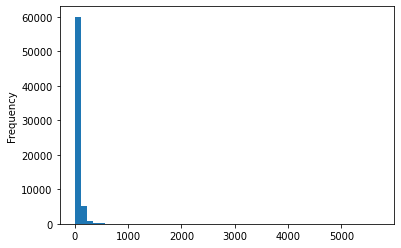

In [117]:
# Distribution of words

df_headers["len"].plot(bins = 50 , kind = "hist")

In [118]:
df_headers.len.describe()

count    66513.000000
mean     54.440666   
std      84.444495   
min      0.000000    
25%      17.000000   
50%      36.000000   
75%      68.000000   
max      5708.000000 
Name: len, dtype: float64

In [119]:
df_headers[df_headers["len"] == 0] # as there are only special characters

,company_name,headers,len
4236,newportcare medical group,©,0
7276,question de finance inc.,... &,0
9178,cedar street asset management llc,​,0
9807,kushal chemicals,﻿,0
13528,"sentynl therapeutics, inc.",.,0
16045,scrap metal merchants,​,0
20228,"go architects, inc.",​,0
27586,morado energy minerals,.,0
32737,smv recruiting,​,0
38906,"brittany janae public relations, inc.",-,0


In [120]:
# Dropping these as they are not adding any value

df_headers.drop(df_headers[df_headers['len'] == 0].index , inplace=True)

In [121]:
df_headers[df_headers["len"] < 3]

,company_name,headers,len
74,secured financial solutions,- Quick Contact,2
84,gallery office solutions limited,Home,1
155,lendings biz,​​Lending.biz,2
263,ranford medical centre,LATEST NEWS,2
274,cavendish asset research ltd,Important Information,2
...,...,...,...
66166,food technology consulting,Contact,1
66172,mckeown fine foods limited,Contact Details:,2
66282,mid-state wine & liquor,Newsletter!,1
66315,juice works,Home Home,2


In [122]:
# Dropping rows having less than 3 words as they are not adding value!

df_headers.drop(df_headers[df_headers["len"] < 3].index , inplace=True)

In [123]:
df_headers.shape

(65017, 3)

**Function to remove punctuation**

In [124]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

**Function to remove stop words**

In [125]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [126]:
stopwords.words("english")[:10] # first 10 stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [127]:
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in stopwords.words("english")]
    # joining the list of words with space separator
    return " ".join(text)

**Function to remove digits from text**

In [128]:
def remove_digits(text):
  '''function for removing digits from text'''

  text = "".join([i for i in text if not i.isdigit()])

  return text

**Function for Stemming**

In [129]:
from nltk.stem.snowball import SnowballStemmer

In [130]:
stemmer = SnowballStemmer("english")

def stemming(text):
  '''a function which stems each word in the given text'''

  l = [stemmer.stem(word) for word in text.split()]
  
  return " ".join(l)

**Function to call each of the above functions**

In [131]:
def text_cleaning(text):
  text = remove_punctuation(text)
  text = remove_stopwords(text)
  text = remove_digits(text)
  text = stemming(text)

  return text

In [132]:
# Checking how our df looks before applying text prepocessing functions

df_headers.head()

,company_name,headers,len
0,elias medical,"Offering Bakersfield family medical care from pediatrics to geriatrics. Also offering skin care including Botox, Laser skin treatments and more. sep Elias Medical Welcome to ELIAS MEDICAL sep Family Medical Practice sep SKIN CARE sep Schedule a Consultation\n661.663.0300 Get To Know Elias Medical sep Family Medical Practice sep Consultations sep Skin Care",55
1,koops overhead doors,Customer Reviews sep Welcome to Koops Overhead Doors!,8
2,midtown eyecare,Welcome to our practice!,4
3,repro security ltd,Welcome to REPRO SECURITY Ltd,5
4,wood green timber company limited,"At Wood Green Timber Co. Ltd., London, and our Potters Bar Hertfordshire Yard we stock a comprehensive selection of timber suitable for a wide variety of uses. From floor joists to decorative mouldings, we have it all, in stock and ready to take away or for delivery if you prefer. Our aim is to maintain high stock levels in order to satisfy all your building requirements immediately, however we are equally happy to source specialist requirements for delivery or collection at a later date. Location | Wood Green sep Opening Hours sep Location | Potter Bar",94


In [133]:
# Applying it to the headers

df_headers["headers"] = df_headers["headers"].apply(text_cleaning)

In [134]:
# Checking data after applying text preprocessing steps defined above

df_headers.head()

,company_name,headers,len
0,elias medical,offer bakersfield famili medic care pediatr geriatr also offer skin care includ botox laser skin treatment sep elia medic welcom elia medic sep famili medic practic sep skin care sep schedul consult get know elia medic sep famili medic practic sep consult sep skin care,55
1,koops overhead doors,custom review sep welcom koop overhead door,8
2,midtown eyecare,welcom practic,4
3,repro security ltd,welcom repro secur ltd,5
4,wood green timber company limited,wood green timber co ltd london potter bar hertfordshir yard stock comprehens select timber suitabl wide varieti use floor joist decor mould stock readi take away deliveri prefer aim maintain high stock level order satisfi build requir immedi howev equal happi sourc specialist requir deliveri collect later date locat wood green sep open hour sep locat potter bar,94


In [166]:
# Now, updating count of words in each header

df_headers["len"] = df_headers["headers"].apply(get_len)

In [167]:
df_headers.head()

,company_name,headers,len
0,elias medical,offering bakersfield family medical care pediatrics geriatrics also offering skin care including botox laser skin treatment sep elia medical welcome elia medical sep family medical practice sep skin care sep schedule consultation get know elia medical sep family medical practice sep consultation sep skin care,45
1,koops overhead doors,customer review sep welcome koops overhead door,7
2,midtown eyecare,welcome practice,2
3,repro security ltd,welcome repro security ltd,4
4,wood green timber company limited,wood green timber co ltd london potter bar hertfordshire yard stock comprehensive selection timber suitable wide variety us floor joist decorative moulding stock ready take away delivery prefer aim maintain high stock level order satisfy building requirement immediately however equally happy source specialist requirement delivery collection later date location wood green sep opening hour sep location potter bar,58


In [187]:
# Saving this text preprocessed data as a separate file to avoid repeating the same steps again in future

dir = "/content/drive/MyDrive/Almabetter/Capstone Project 2 (Company Classification)/DATA/preprocessed.csv"

df_headers.to_csv(dir , index=False)

In [89]:
dfh["headers"].values

array(['offering bakersfield family medical care pediatrics geriatrics also offering skin care including botox laser skin treatment sep elia medical welcome elia medical sep family medical practice sep skin care sep schedule consultation get know elia medical sep family medical practice sep consultation sep skin care',
       'customer review sep welcome koops overhead door',
       'welcome practice', ...,
       'beautyologist beauty salon welcome beautyologist sep sias spotlight specialist skin body beauty sep lymphatic drainage facial massage sep fear missing',
       'mobile hair makeup artist across uk use u sep artist available location sep background sep here help sep hair makeup artist uk sep key member team sep here client say fran sep special occasion sep lesson sep head office sep popular service sep chloep sep connect u sep alison sep request call back sep hen party sep beauty call sep beauty call head office sep ella sep gracer sep contact via email sep beckys sep samanth

**Vectorization**

In [3]:
# Reading data

path = "/content/drive/MyDrive/Almabetter/Capstone Project 2 (Company Classification)/DATA/preprocessed.csv"

dfh = pd.read_csv(path)

In [4]:
# importing TF-IDF vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
# Instantiating object of tfidf

vectorizer = TfidfVectorizer(max_df=0.80 , min_df=0.01) # we will ignore those words that appear in more than 80% of the documents(here, header). Also, removing those that appear in less than 1% of the documents


In [6]:
# Fitting & transforming

X = vectorizer.fit_transform(dfh["headers"])

In [7]:
X.shape

(66436, 444)

In [8]:
X # sparse matrix

<66436x444 sparse matrix of type '<class 'numpy.float64'>'
	with 737977 stored elements in Compressed Sparse Row format>

In [9]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
X = X.toarray() # this matrix will be our input to model

##**Clustering**

###**K-Means**

In [11]:
# Importing

from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(init="k-means++", n_clusters=5, random_state=42)

In [13]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [14]:
kmeans.cluster_centers_

array([[0.00386074, 0.00488663, 0.00290322, ..., 0.00822467, 0.01084618,
        0.00249866],
       [0.00368414, 0.00433941, 0.00995826, ..., 0.00544673, 0.01412988,
        0.00180135],
       [0.00150597, 0.00245999, 0.00044418, ..., 0.01257636, 0.01132995,
        0.00167333],
       [0.00224549, 0.00151917, 0.00038819, ..., 0.00120804, 0.00965743,
        0.00199144],
       [0.00179453, 0.00202275, 0.00106406, ..., 0.00474192, 0.00968762,
        0.00347992]])

In [15]:
kmeans.labels_[:10] #first 10

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int32)

In [16]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)

In [17]:
dict_data = dict(zip(unique, counts))
dict_data

{0: 47001, 1: 11310, 2: 2377, 3: 1701, 4: 4047}

In [18]:
kmeans.inertia_

60810.7695794547

In [19]:
dfh["cluster"] = kmeans.labels_

In [20]:
dfh.head()

,company_name,headers,len,cluster
0,elias medical,offering bakersfield family medical care pedia...,45,0
1,koops overhead doors,customer review sep welcome koops overhead door,7,0
2,midtown eyecare,welcome practice,2,0
3,repro security ltd,welcome repro security ltd,4,0
4,wood green timber company limited,wood green timber co ltd london potter bar her...,58,0


**Optimal K**

**1) Elbow Method**

In [21]:
kmeans_kwargs = {"init": "k-means++", "n_init": 10, "max_iter": 300, "random_state": 42}

In [90]:
# A list holds the SSE values for each k

sse = []
for k in range(2, 15):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(X)
  sse.append(kmeans.inertia_)

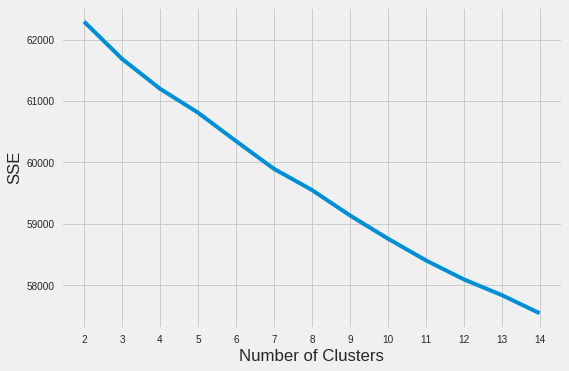

In [93]:
# Plotting

plt.style.use("fivethirtyeight")
plt.plot(range(2, 15), sse)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

**Alternatively**

In [24]:
kmeans = KMeans(init="k-means++", n_clusters=5, random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f29983ce090>,
                 k=None, metric=None, model=None, timings=False)

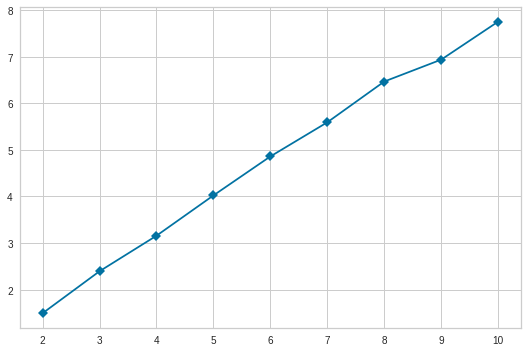

In [28]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(kmeans, k=(2,11),metric= 'distortion',timings= False,locate_elbow=True)

visualizer.fit(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f2998a76490>,
                 k=None, metric=None, model=None, timings=False)

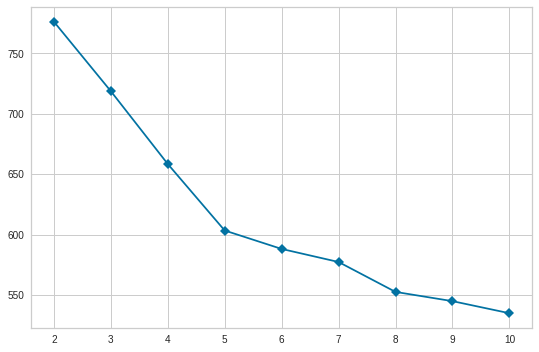

In [26]:
#Calinski Harabaz

visualizer = KElbowVisualizer(kmeans, k=(2,11), metric='calinski_harabaz', timings=False, locate_elbow=True)
visualizer.fit(X)

In [31]:
from sklearn.metrics import silhouette_score , silhouette_samples
import matplotlib.cm as cm

In [ ]:
#Silhoutte Score

visualizer = KElbowVisualizer(kmeans, k=(2,11), metric='silhouette', timings=False, locate_elbow=True)
visualizer.fit(X)

For n_clusters = 2 The average silhouette_score is : 0.01480356744094033
For n_clusters = 3 The average silhouette_score is : 0.015857339189720366
For n_clusters = 4 The average silhouette_score is : 0.01838811377350445
For n_clusters = 5 The average silhouette_score is : 0.019981469847297324
For n_clusters = 6 The average silhouette_score is : 0.022293886005487387
For n_clusters = 7 The average silhouette_score is : 0.02453065088246301
For n_clusters = 8 The average silhouette_score is : 0.02640478049528088
For n_clusters = 9 The average silhouette_score is : 0.027724531390830056
For n_clusters = 10 The average silhouette_score is : 0.029912732055524385


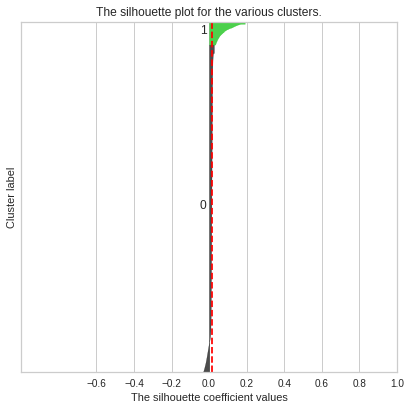

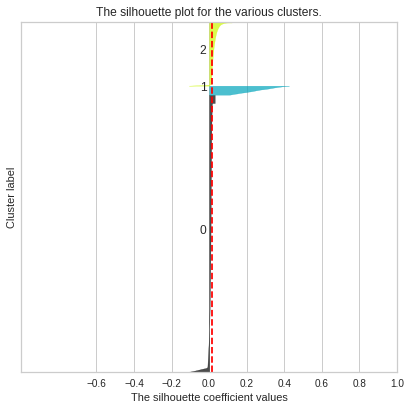

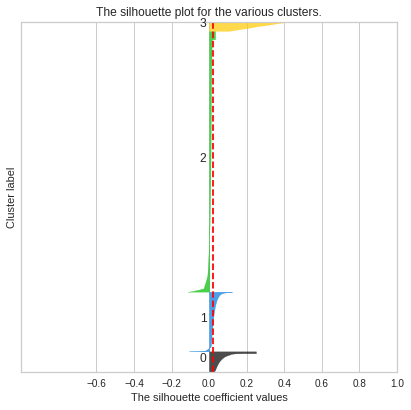

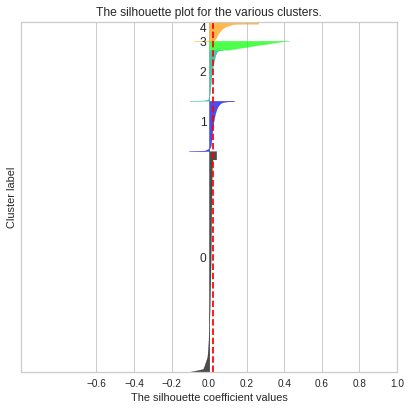

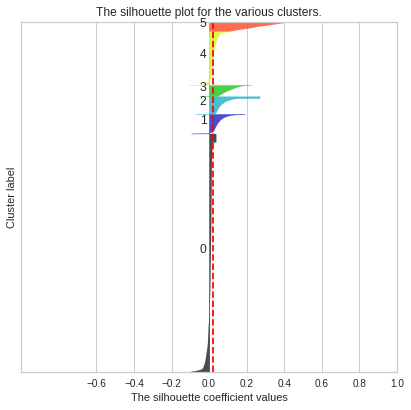

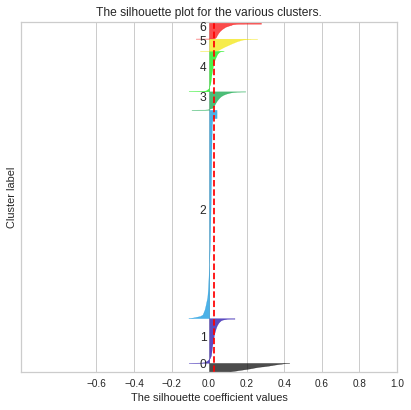

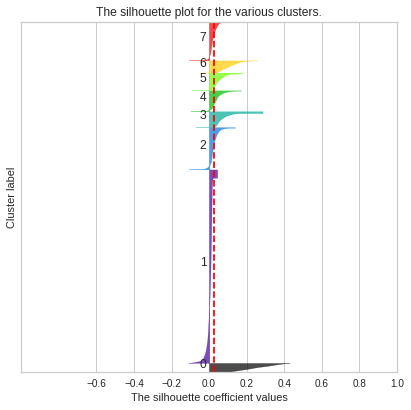

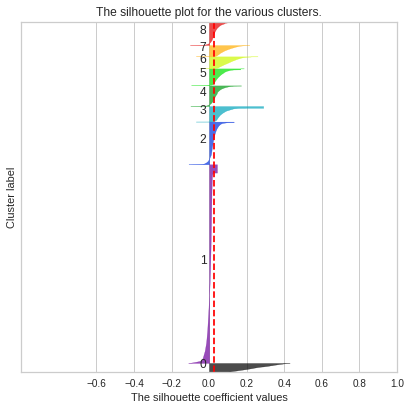

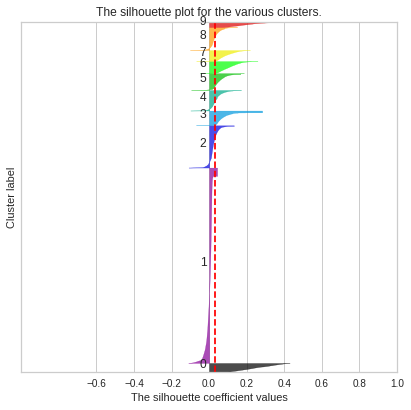

In [32]:
range_n_clusters = np.arange(2,11)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax) = plt.subplots(1)
    fig.set_size_inches(6, 6)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and
    # seed of 10 for reproducibility.
    clusterer = KMeans(init = "k-means++" , n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.6,-0.4,-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

**Word cloud**

In [36]:
!apt install wordcloud

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package wordcloud


In [38]:
from wordcloud import WordCloud

In [61]:
vectorizer.get_feature_names()

['access',
 'account',
 'accounting',
 'across',
 'address',
 'advanced',
 'advantage',
 'advice',
 'affordable',
 'agency',
 'air',
 'always',
 'animal',
 'app',
 'application',
 'appointment',
 'approach',
 'area',
 'article',
 'asset',
 'attorney',
 'auto',
 'available',
 'award',
 'back',
 'based',
 'become',
 'benefit',
 'best',
 'better',
 'big',
 'blog',
 'book',
 'brand',
 'build',
 'building',
 'business',
 'buy',
 'call',
 'car',
 'care',
 'career',
 'case',
 'category',
 'center',
 'certified',
 'change',
 'check',
 'choice',
 'choose',
 'city',
 'class',
 'clean',
 'cleaning',
 'click',
 'client',
 'clinic',
 'cloud',
 'coffee',
 'come',
 'commercial',
 'commitment',
 'communication',
 'community',
 'company',
 'complete',
 'comprehensive',
 'connect',
 'connected',
 'construction',
 'consultation',
 'consulting',
 'contact',
 'content',
 'contract',
 'contractor',
 'control',
 'corporate',
 'cost',
 'county',
 'course',
 'create',
 'creative',
 'credit',
 'current',
 'cust

In [84]:
vectorizer.vocabulary_

{'access': 0,
 'account': 1,
 'accounting': 2,
 'across': 3,
 'address': 4,
 'advanced': 5,
 'advantage': 6,
 'advice': 7,
 'affordable': 8,
 'agency': 9,
 'air': 10,
 'always': 11,
 'animal': 12,
 'app': 13,
 'application': 14,
 'appointment': 15,
 'approach': 16,
 'area': 17,
 'article': 18,
 'asset': 19,
 'attorney': 20,
 'auto': 21,
 'available': 22,
 'award': 23,
 'back': 24,
 'based': 25,
 'become': 26,
 'benefit': 27,
 'best': 28,
 'better': 29,
 'big': 30,
 'blog': 31,
 'book': 32,
 'brand': 33,
 'build': 34,
 'building': 35,
 'business': 36,
 'buy': 37,
 'call': 38,
 'car': 39,
 'care': 40,
 'career': 41,
 'case': 42,
 'category': 43,
 'center': 44,
 'certified': 45,
 'change': 46,
 'check': 47,
 'choice': 48,
 'choose': 49,
 'city': 50,
 'class': 51,
 'clean': 52,
 'cleaning': 53,
 'click': 54,
 'client': 55,
 'clinic': 56,
 'cloud': 57,
 'coffee': 58,
 'come': 59,
 'commercial': 60,
 'commitment': 61,
 'communication': 62,
 'community': 63,
 'company': 64,
 'complete': 65,
 

In [62]:
d0 = pd.DataFrame(X , columns=vectorizer.get_feature_names())

In [64]:
d0.head()

,access,account,accounting,across,address,advanced,advantage,advice,affordable,agency,air,always,animal,app,application,appointment,approach,area,article,asset,attorney,auto,available,award,back,based,become,benefit,best,better,big,blog,book,brand,build,building,business,buy,call,car,...,tip,today,together,tool,top,touch,training,transport,transportation,truck,trust,trusted,type,uk,unique,upcoming,update,use,using,value,veterinary,video,view,vision,visit,want,water,way,we,web,website,welcome,well,west,whats,work,working,world,year,you
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.081823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.465329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.546193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.402400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.201886,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
d0.iloc[[0]]

,access,account,accounting,across,address,advanced,advantage,advice,affordable,agency,air,always,animal,app,application,appointment,approach,area,article,asset,attorney,auto,available,award,back,based,become,benefit,best,better,big,blog,book,brand,build,building,business,buy,call,car,...,tip,today,together,tool,top,touch,training,transport,transportation,truck,trust,trusted,type,uk,unique,upcoming,update,use,using,value,veterinary,video,view,vision,visit,want,water,way,we,web,website,welcome,well,west,whats,work,working,world,year,you
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.081823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
# prep tf-idf matrix for word cloud

data = d0.T #transposing

In [70]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,66396,66397,66398,66399,66400,66401,66402,66403,66404,66405,66406,66407,66408,66409,66410,66411,66412,66413,66414,66415,66416,66417,66418,66419,66420,66421,66422,66423,66424,66425,66426,66427,66428,66429,66430,66431,66432,66433,66434,66435
access,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
account,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.539424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.151162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
accounting,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
across,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.175915,0.0
address,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.264051,0.0,0.0,0.0,0.0,0.253489,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.168158,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [87]:
d0.T.sum(axis=1)

access         237.786977
account        295.369995
accounting     255.139581
across         186.650789
address        297.344397
                 ...     
work          1006.051698
working        275.334481
world          499.295840
year           752.171032
you            159.257603
Length: 444, dtype: float64

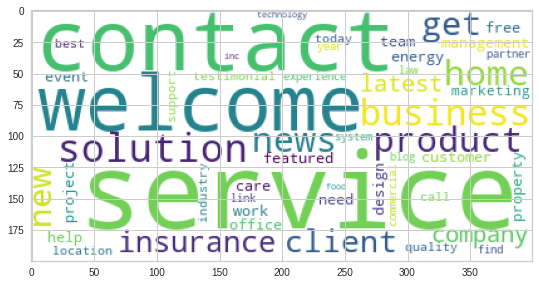

In [88]:
wordcloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(d0.T.sum(axis=1))
plt.imshow(wordcloud)